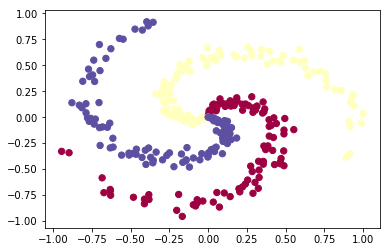

(300, 2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()
X.shape

In [7]:
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):
  
  # evaluate class scores, [N x K]
  A1 = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  Z2 = np.dot(A1, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(Z2)
  A2 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(A2[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print ("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dZ2 = A2
  dZ2[range(num_examples),y] -= 1
  dZ2 /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(A1.T, dZ2)
  db2 = np.sum(dZ2, axis=0, keepdims=True)
  # next backprop into hidden layer
  dA1 = np.dot(dZ2, W2.T)
  # backprop the ReLU non-linearity
  dA1[A1 <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dA1)
  db = np.sum(dA1, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098657
iteration 1000: loss 0.294122
iteration 2000: loss 0.259667
iteration 3000: loss 0.251820
iteration 4000: loss 0.250187
iteration 5000: loss 0.249468
iteration 6000: loss 0.249137
iteration 7000: loss 0.248983
iteration 8000: loss 0.248914
iteration 9000: loss 0.248854


In [3]:
dhidden[hidden_layer <= 0]

array([0., 0., 0., ..., 0., 0., 0.])

In [4]:
dhidden

array([[-9.20432344e-04,  1.93664474e-03, -6.82031786e-04, ...,
        -7.96934464e-04,  1.40790027e-03,  1.83009529e-05],
       [-8.41993795e-04,  1.84114191e-03, -6.23909719e-04, ...,
        -7.29024638e-04,  1.33665744e-03,  2.61540972e-06],
       [-7.64294214e-04,  1.79899600e-03, -5.66335343e-04, ...,
        -6.61757852e-04,  1.30285244e-03, -2.35787355e-05],
       ...,
       [ 1.09690092e-04,  1.86186843e-04,  8.12783403e-05, ...,
         9.49466139e-05,  1.24474600e-04,  0.00000000e+00],
       [ 1.99523972e-06,  3.58494266e-06,  1.47843546e-06, ...,
         1.72704662e-06,  2.40311311e-06,  0.00000000e+00],
       [ 5.77205557e-05,  9.88001082e-05,  4.27698680e-05, ...,
         4.99622672e-05,  6.60791951e-05,  0.00000000e+00]])

In [5]:
hidden_layer <= 0

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True]])